In [67]:
import matplotlib.pyplot as plt
from pylab import rcParams

import numpy as np
import pandas as pd
import scipy.stats as stats

import pickle
import json

# Testing script results

In [212]:
with open('data/multiprocessing_log_test.pickle', 'rb') as handle:
    log = pickle.load(handle)

In [213]:
sigma1, sigma2, sigma3 = 0.6827, 0.9545, 0.9973
lambda1, lambda2, lambda3 = stats.chi2.ppf(sigma1, 2), stats.chi2.ppf(sigma2, 2), stats.chi2.ppf(sigma3, 2)

In [214]:
test = np.array(log[100]['result'])

C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_5496\616874641.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test = np.array(log[100]['result'])


In [247]:
test

array([[(0.0, 0.2620690317357481, 0.0), inf],
       [(0.0, 0.2620690317357481, 1.0101010101010102),
        485756.79241564893],
       [(0.0, 0.2620690317357481, 2.0202020202020203),
        355045.31600915105],
       ...,
       [(1.0, 0.2620690317357481, 97.97979797979798), 4082.3497301971533],
       [(1.0, 0.2620690317357481, 98.98989898989899), 4275.750364168977],
       [(1.0, 0.2620690317357481, 100.0), 4471.59803060604]], dtype=object)

In [215]:
df = pd.DataFrame(test, columns = ['params', 'ratio'])

In [240]:
log[100]['result'][0]

((0.0, 0.2620690317357481, 0.0), inf)

In [230]:
x, y, c = [], [], []
for i in test:
    x.append(i[0][0])
    y.append(i[0][2])
    c.append(10/(1 + 24.4*np.exp(-i[1])))
    
x = x[1::]
y = y[1::]
c = c[1::]

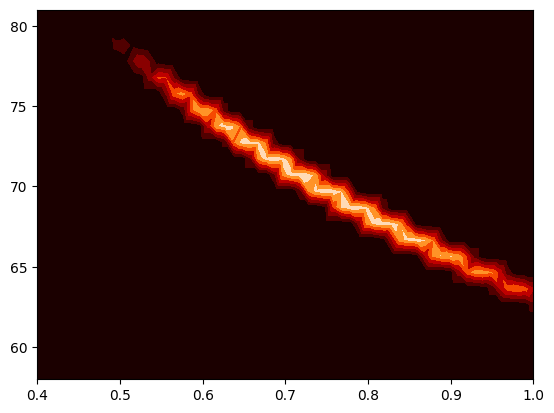

In [237]:
plt.tricontourf(x, y, c, cmap = 'gist_heat_r')

plt.xlim(0.4, 1)
plt.ylim(58, 81)
plt.show()

# Alternative of grid generating

## Generating a grid centered in a seed value

In [38]:
def generate_grid(x, y, z): #(Omega_Lambda, Omega_matter, Hubble)
    for i in x:
        for j in y:
            for k in z:
                yield (i, j, k)

In [41]:
def free_params_parser(config, grid_size):
    if "Hubble" not in config['free']:
        _grid = generate_grid(
            np.linspace(config['grid']['Omega_l'][0], config['grid']['Omega_l'][1], grid_size), 
            np.linspace(config['grid']['Omega_m'][0], config['grid']['Omega_m'][1], grid_size), 
            [config['minimum'][2]],
        )
        return _grid
    elif "Omega_l" not in config['free']:
        _grid = generate_grid(
            [config['minimum'][0]], 
            np.linspace(config['grid']['Omega_m'][0], config['grid']['Omega_m'][1], grid_size), 
            np.linspace(config['grid']['Hubble'][0], config['grid']['Hubble'][1], grid_size),
        )
        return _grid
    elif "Omega_m" not in config['free']:
        _grid = generate_grid(
            np.linspace(config['grid']['Omega_l'][0], config['grid']['Omega_l'][1], grid_size),
            [config['minimum'][1]],
            np.linspace(config['grid']['Hubble'][0], config['grid']['Hubble'][1], grid_size),
        )
        return _grid

In [42]:
with open('config/likelihood_ratio_config.json') as f:
    config = json.load(f)
    
config['minimum'] = [ 0.73654492,  0.26206903, 70.11226543]

for i in free_params_parser(config, 10):
    print(i)

(0.0, 0.26206903, 50.0)
(0.0, 0.26206903, 53.333333333333336)
(0.0, 0.26206903, 56.666666666666664)
(0.0, 0.26206903, 60.0)
(0.0, 0.26206903, 63.333333333333336)
(0.0, 0.26206903, 66.66666666666667)
(0.0, 0.26206903, 70.0)
(0.0, 0.26206903, 73.33333333333334)
(0.0, 0.26206903, 76.66666666666667)
(0.0, 0.26206903, 80.0)
(0.1111111111111111, 0.26206903, 50.0)
(0.1111111111111111, 0.26206903, 53.333333333333336)
(0.1111111111111111, 0.26206903, 56.666666666666664)
(0.1111111111111111, 0.26206903, 60.0)
(0.1111111111111111, 0.26206903, 63.333333333333336)
(0.1111111111111111, 0.26206903, 66.66666666666667)
(0.1111111111111111, 0.26206903, 70.0)
(0.1111111111111111, 0.26206903, 73.33333333333334)
(0.1111111111111111, 0.26206903, 76.66666666666667)
(0.1111111111111111, 0.26206903, 80.0)
(0.2222222222222222, 0.26206903, 50.0)
(0.2222222222222222, 0.26206903, 53.333333333333336)
(0.2222222222222222, 0.26206903, 56.666666666666664)
(0.2222222222222222, 0.26206903, 60.0)
(0.2222222222222222, 0.2